<a href="https://colab.research.google.com/github/TheBottomOfTheDeepDarkOcean/AIO-Exercise/blob/develop/Module4/Module4_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random


In [2]:
def get_column(data, index):
  result = [row[index] for row in data]
  return result

def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

  tv_data = get_column(data, 0)

  radio_data = get_column(data, 1)

  newpaper_data = get_column(data, 2)

  sales_data = get_column(data, 3)

  X = [tv_data, radio_data, newpaper_data]

  y = sales_data

  return X, y

In [3]:
X , y = prepare_data('advertising.csv')

In [4]:
def initalize_pagram():
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344 , 0)
    return w1, w2, w3, b

In [5]:
def predict(x1, x2, x3, w1, w2, w3, b):
  return w1*x1 + w2*x2 + w3*x3 + b

In [6]:
def compute_loss(y_hat, y):
  return (y_hat - y)**2


In [7]:
def compute_loss_MAE(y_hat, y):
  return abs(y_hat - y)

In [8]:
def compute_gradient_wi(xi, y, y_hat):
  return 2 * xi * (y_hat - y)

def compute_gradient_b(y, y_hat):
  return 2 * (y_hat - y)

In [9]:
def update_weight_wi(wi, dl_dwi, lr):
  return wi - lr * dl_dwi

def update_weight_b(b, dl_db, lr):
  return b - lr * dl_db

In [13]:
def implement_linear_regression(X_data, y_data, epoch_max = 50, lr = 1e-5):
  losses = []
  losses_MAE = []
  N = int(len(y_data))
  # def initalize_pagram():
  #   w1 = random.gauss(mu=0, sigma=0.01)
  #   w2 = random.gauss(mu=0, sigma=0.01)
  #   w3 = random.gauss(mu=0, sigma=0.01)
  #   b = 0
  #   return w1, w2, w3, b

  w1, w2, w3, b = initalize_pagram()

  for epoch in range(epoch_max):
    for i in range(N):
      x1 = X_data[0][i]
      x2 = X_data[1][i]
      x3 = X_data[2][i]
      y = y_data[i]

      y_hat = predict(x1, x2, x3, w1, w2, w3, b)

      loss = compute_loss(y_hat, y)
      loss_MAE = compute_loss_MAE(y_hat, y)
      losses.append(loss)
      losses_MAE.append(loss_MAE)

      dl_x1 = compute_gradient_wi(x1, y, y_hat)
      dl_x2 = compute_gradient_wi(x2, y, y_hat)
      dl_x3 = compute_gradient_wi(x3, y, y_hat)
      dl_b = compute_gradient_b(y, y_hat)

      w1 = update_weight_wi(w1, dl_x1, lr)
      w2 = update_weight_wi(w2, dl_x2, lr)
      w3 = update_weight_wi(w3, dl_x3, lr)
      b = update_weight_b(b, dl_b, lr)

  return w1, w2, w3, b, losses, losses_MAE

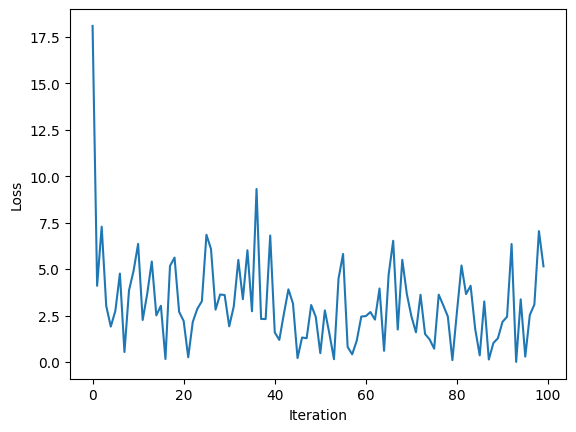

In [14]:
w1, w2, w3, b, losses, losses_MAE = implement_linear_regression(X, y)
plt.plot(losses_MAE[:100])
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [16]:
l = compute_loss_MAE(y_hat =1, y =0.5)
print(l)

0.5


In [17]:
def compute_loss_MSE_Nsamples(y_hat, y, N):
  loss = 0
  for i in range(N):
    loss += (y_hat[i] - y[i])**2
  return loss/N

In [21]:
def implement_linear_regression_Nsamples(x_data, y_data, epoch_max = 50, lr = 1e-5):
  losses = []
  w1, w2, w3, b = initalize_pagram()
  N = len(y_data)

  for epoch in range(epoch_max):

    loss_total = 0
    dw1_total = 0
    dw2_total = 0
    dw3_total = 0
    db_total = 0

    for i in range(N):

      x1 = x_data[0][i]
      x2 = x_data[1][i]
      x3 = x_data[2][i]
      y = y_data[i]

      y_hat = predict(x1, x2, x3, w1, w2, w3, b)

      loss = compute_loss(y_hat, y)
      loss_total += loss


      dl_x1 = compute_gradient_wi(x1, y, y_hat)
      dl_x2 = compute_gradient_wi(x2, y, y_hat)
      dl_x3 = compute_gradient_wi(x3, y, y_hat)
      dl_b = compute_gradient_b(y, y_hat)

      dw1_total += dl_x1
      dw2_total += dl_x2
      dw3_total += dl_x3
      db_total += dl_b
    loss_total = loss_total/N
    dw1_total = dw1_total/N
    dw2_total = dw2_total/N
    dw3_total = dw3_total/N
    db_total = db_total/N

    losses.append(loss_total)

    w1 = update_weight_wi(w1, dw1_total, lr)
    w2 = update_weight_wi(w2, dw2_total, lr)
    w3 = update_weight_wi(w3, dw3_total, lr)
    b = update_weight_b(b, db_total, lr)

  return w1, w2, w3, b, losses


In [22]:
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression_Nsamples(X, y, epoch_max = 1000, lr = 1e-5)
print(w1, w2, w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403


In [23]:
def prepare_data_new(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

  tv_data = get_column(data, 0)
  radio_data = get_column(data, 1)
  newpaper_data = get_column(data, 2)
  sales_data = get_column(data, 3)

  X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newpaper_data)]

  y = sales_data

  return X, y

In [24]:
def initalize_pagram():
  bias = 0
  w1 = random.gauss(mu=0, sigma=0.01)
  w2 = random.gauss(mu=0, sigma=0.01)
  w3 = random.gauss(mu=0, sigma=0.01)
  return [0, -0.01268850433497871, 0.004752496982185252, 0.0073796171538643845]

In [60]:
def predict(X_features, weights):
  return X_features[0] * weights[0] + X_features[1] * weights[1] + X_features[2] * weights[2] + X_features[3] * weights[3]

def compute_loss_new(y_hat, y):
  return (y_hat - y)**2

def compute_gradient_wi_new(X_features, y, y_hat):
  dl_weights = []
  n = len(X_features)
  for i in range(n):
    dl_weights.append(2 * X_features[i] * (y_hat - y))
  return dl_weights

def update_weight_wi_new(wi, dl_dwi, lr):
  w = []
  for i in range(len(wi)):
    w.append(wi[i] - lr * dl_dwi[i])
  return w

In [62]:
def implement_linear_regression_new(X_features, y_output, epoch_max = 50, lr = 1e-5):
  losses = []
  weights = initalize_pagram()

  N = len(y_output)

  for epoch in range(epoch_max):
    for i in range(N):
      features_i = X_features[i]
      y = y_output[i]

      y_hat = predict(features_i, weights)

      loss = compute_loss_new(y_hat, y)
      losses.append(loss)

      dl_weights = compute_gradient_wi_new(features_i, y, y_hat)

      weights = update_weight_wi_new(weights, dl_weights, lr)

  return weights, losses

In [63]:
X, y = prepare_data_new('advertising.csv')
weights, L = implement_linear_regression_new(X, y, epoch_max =50, lr = 1e-5)
print(L[9999])

31.339223408109948
